In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory = '/content/drive/MyDrive/City of Boston: Permitting D/Project Files/data/merged.csv'

In [57]:
df = pd.read_csv(directory)
df.head()

<ipython-input-57-d9d45455cb56>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory)


,ID,city,zip,Description,Approved
0,1,Boston,2109.0,Interior/Exterior Work,1
1,2,West Roxbury,2132.0,City of Boston,1
2,3,Charlestown,2129.0,Other,1
3,4,Roxbury,2118.0,Interior/Exterior Work,1
4,5,Brighton,2135.0,Renovations - Exterior,1


In [58]:
df = df.dropna()

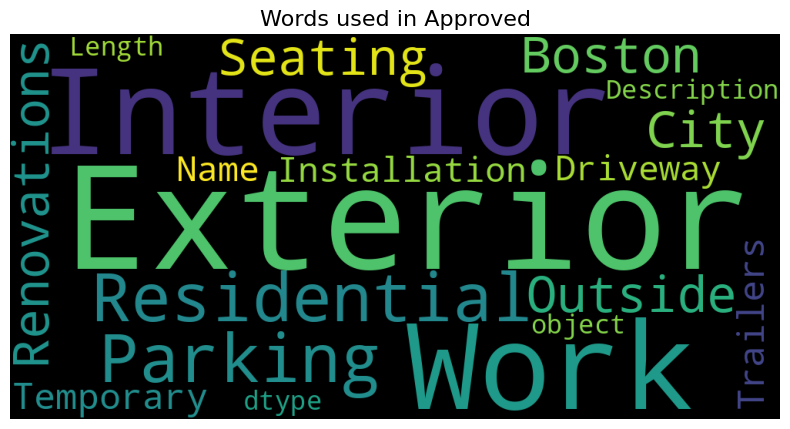

In [59]:
words_summary = pd.Series(' '.join(str(df.loc[df.Approved==1]['Description']).split()))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud_summary = WordCloud(width = 1000, height = 500).generate(' '.join(words_summary))

plt.figure(figsize=(10,5))

plt.imshow(wordcloud_summary)
plt.title("Words used in Approved", size=16)

plt.axis("off")
plt.show()

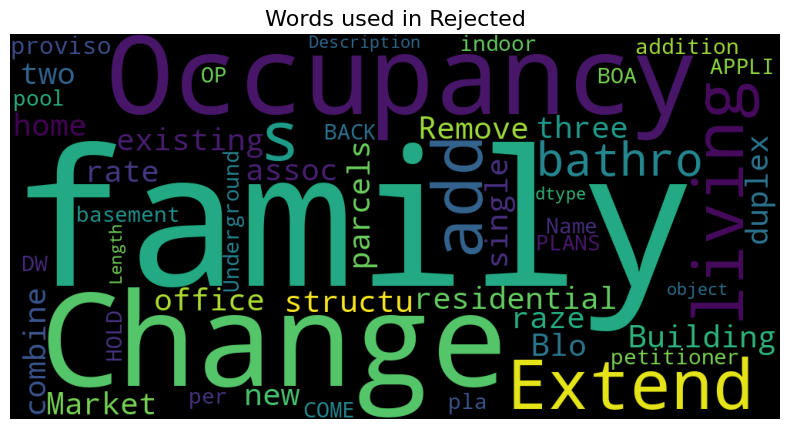

In [60]:
words_summary = pd.Series(' '.join(str(df.loc[df.Approved==0]['Description']).split()))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud_summary = WordCloud(width = 1000, height = 500).generate(' '.join(words_summary))

plt.figure(figsize=(10,5))

plt.imshow(wordcloud_summary)
plt.title("Words used in Rejected", size=16)

plt.axis("off")
plt.show()

In [61]:
df.zip.unique()

array([2109., 2132., 2129., 2118., 2135., 2134., 2114., 2119., 2130.,
       2128., 2124., 2111., 2108., 2136., 2121., 2127., 2210., 2199.,
       2125., 2122., 2215., 2116., 2110., 2113., 2115., 2120., 2126.,
       2131., 2467., 2163., 1803., 2201., 2117., 2151., 2137., 2203.,
       2103., 2133., 8091., 2222., 2104., 2123., 2446., 2026., 2148.,
       2158.])

In [62]:
df.city.unique()

array(['Boston', 'West Roxbury', 'Charlestown', 'Roxbury', 'Brighton',
       'Allston', 'Jamaica Plain', 'East Boston', 'Dorchester',
       'Hyde Park', 'South Boston', 'Roslindale', 'BOSTON',
       'Mission Hill', 'Mattapan', 'Jamaica Plain/', 'Chestnut Hill',
       'NorthEnd/', 'DORCHESTER', 'Dorchester/', 'South Boston/',
       'Mission Hill/', 'Boston/West End', 'West End', 'NorthEnd',
       'Roxbury/', 'Fenway', 'Boston/Roxbury', 'ROXBURY', 'South End',
       'Financial District', 'BOSTON/', 'Charlestown/', 'Back Bay/Boston',
       'Boston/Downtown', "Boston's Historic North End",
       'Dorchester Center/', 'Dorchester Center',
       'Downtown/Financial District', 'Dorchester (Lower Mills)/',
       'BRIGHTON', 'ALLSTON', 'Dorchester//', 'Fenway/',
       'Boston/Beacon Hill', 'BOSTON/CHINATOWN', 'Boston/Chinatown',
       'Chinatown', 'Hyde Park/', 'South End/', 'BRIGHTON/',
       'BOSTON/Waterfront', 'HYDE PARK', 'Boston/Back Bay',
       'East Boston/', 'MATTAPAN', 

In [63]:
df['city'] = df['city'].str.replace('[^a-zA-Z]', '', regex=True)

In [64]:
df['city'] = df['city'].str.lower()

In [77]:
roxbury_mapping = {
    'westroxbury': 'roxbury',
    'bostonroxbury': 'roxbury',
    'roxburycrossin': 'roxbury',
    'ropxbury': 'roxbury',
    'roxburycrossing': 'roxbury',
    'roxburyboston': 'roxbury',
    'westroxbry': 'roxbury',
    'bostonwestend': 'westend',
    'backbayboston': 'backbay',
    'bostondowntown': 'downtown',
    'bostonhistoricnorthend': 'northend',
    'dorchestercenter': 'dorchester',
    'downtownfinancialdistrict': 'downtown',
    'dorchesterlowermills': 'dorchester',
    'bostonbeaconhill': 'beaconhill',
    'bostonchinatown': 'chinatown',
    'bostonwaterfront': 'waterfront',
    'bostonbackbay': 'backbay',
    'bostonfenwaykenmoreaudubo': 'fenway',
    'allstonboston': 'allston',
    'brightonallston': 'brighton',
    'southbostonsouthboston': 'southboston',
    'jamaicaplainboston': 'jamaicaplain',
    'charlestownboston': 'charlestown',
    'bostonsouth': 'southend',
    'bostonnorthend': 'northend',
    'charleswtown': 'charlestown',
    'kenmorefenway': 'fenway',
    'bostoncharlestown': 'charlestown',
    'bostonsouthend': 'southend',
    'bostonroslindale': 'roslindale',
    'dorchestersavinhill': 'dorchester',
    'eboston': 'eastboston',
    'southbostonsg': 'southboston',
    'bostonfenway': 'fenway',
    'allstonbrighton': 'allston',
    'downtownfinancial': 'downtown',
    'back': 'backbay',
    'eastbostonboston': 'eastboston'
}
df['city'] = df['city'].replace(roxbury_mapping)

In [78]:
df.city.unique()

array(['boston', 'roxbury', 'charlestown', 'brighton', 'allston',
       'jamaicaplain', 'eastboston', 'dorchester', 'hydepark',
       'southboston', 'roslindale', 'missionhill', 'mattapan',
       'chestnuthill', 'northend', 'westend', 'fenway', 'southend',
       'financialdistrict', 'backbay', 'downtown',
       'bostonshistoricnorthend', 'beaconhill', 'chinatown', 'waterfront',
       'theaterdistrict', ''], dtype=object)

In [79]:
df.loc[df.Approved==0].groupby('city')['ID'].count().nlargest(10)

city
dorchester      1870
roxbury         1215
boston          1182
southboston     1050
eastboston       886
jamaicaplain     507
roslindale       428
charlestown      385
brighton         373
hydepark         330
Name: ID, dtype: int64

In [80]:
df.loc[df.Approved==0].groupby('city')['ID'].count().nsmallest(10)

city
downtown          1
fenway            1
southend          1
westend           1
chestnuthill      2
missionhill     106
allston         177
mattapan        255
hydepark        330
brighton        373
Name: ID, dtype: int64

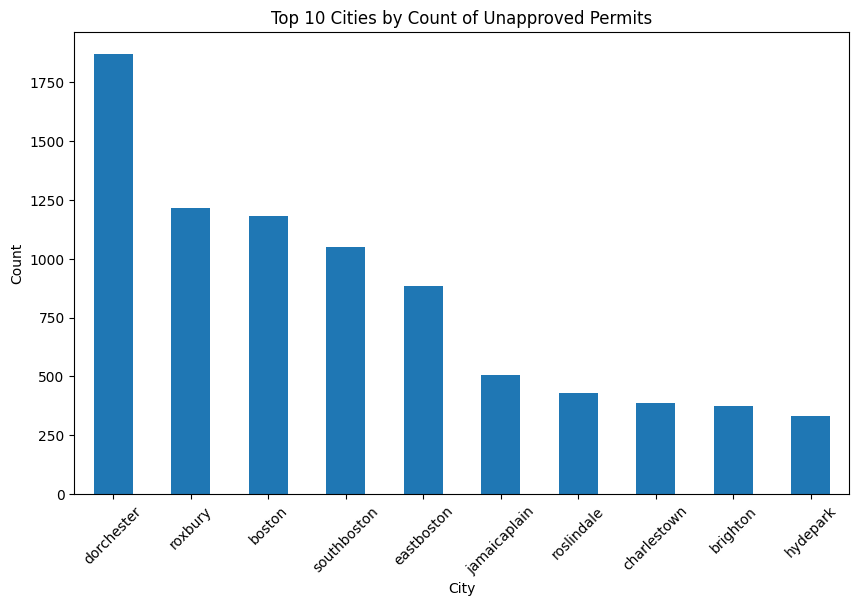

In [81]:
count_data = df.loc[df.Approved == 0].groupby('city')['ID'].count().nlargest(10)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities by Count of Unapproved Permits')
plt.xticks(rotation=45)
plt.show()

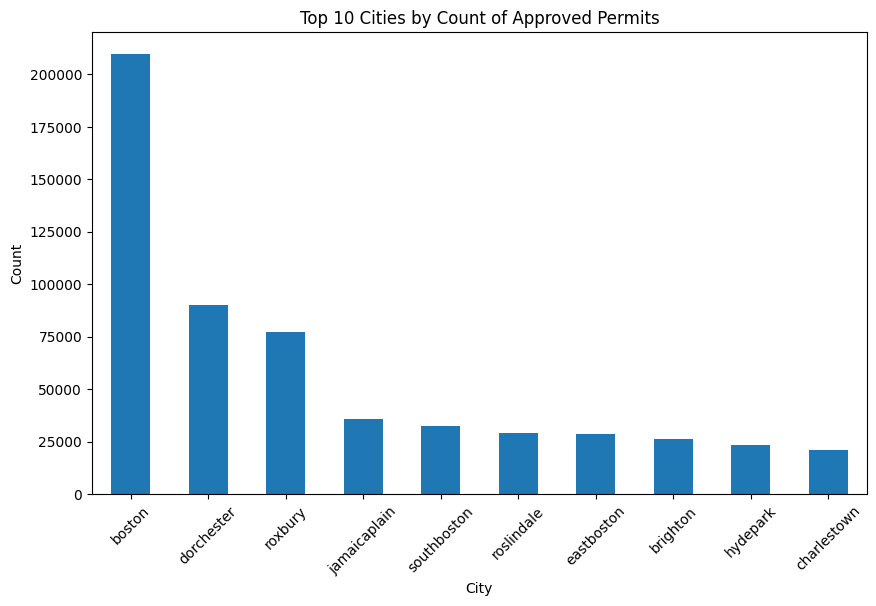

In [82]:
count_data = df.loc[df.Approved == 1].groupby('city')['ID'].count().nlargest(10)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities by Count of Approved Permits')
plt.xticks(rotation=45)
plt.show()

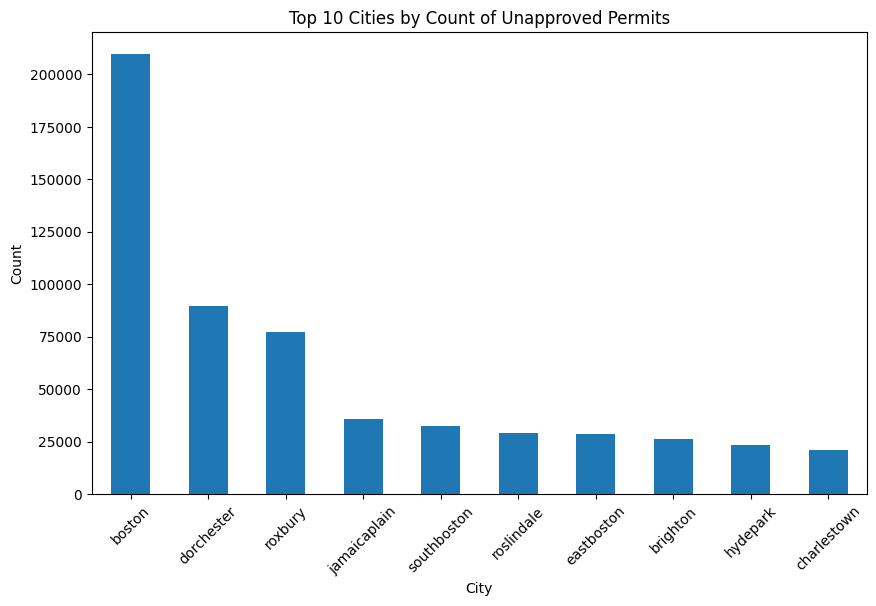

In [76]:
count_data = df.loc[df.Approved == 1].groupby('city')['ID'].count().nlargest(10)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities by Count of Unapproved Permits')
plt.xticks(rotation=45)
plt.show()

In [69]:
df['zip'] = df['zip'].astype(int).astype(str).str.pad(width=5, side='left', fillchar='0')

In [70]:
df.zip

0         02109
1         02132
2         02129
3         02118
4         02135
          ...  
631311    02111
631312    02131
631313    02111
631314    02116
631315    02132
Name: zip, Length: 625895, dtype: object

In [71]:
df.loc[df.Approved==0].groupby('zip')['ID'].count().nlargest(10)

zip
02127    1060
02128     885
02124     658
02125     529
02130     509
02118     442
02131     427
02122     406
02132     397
02129     385
Name: ID, dtype: int64

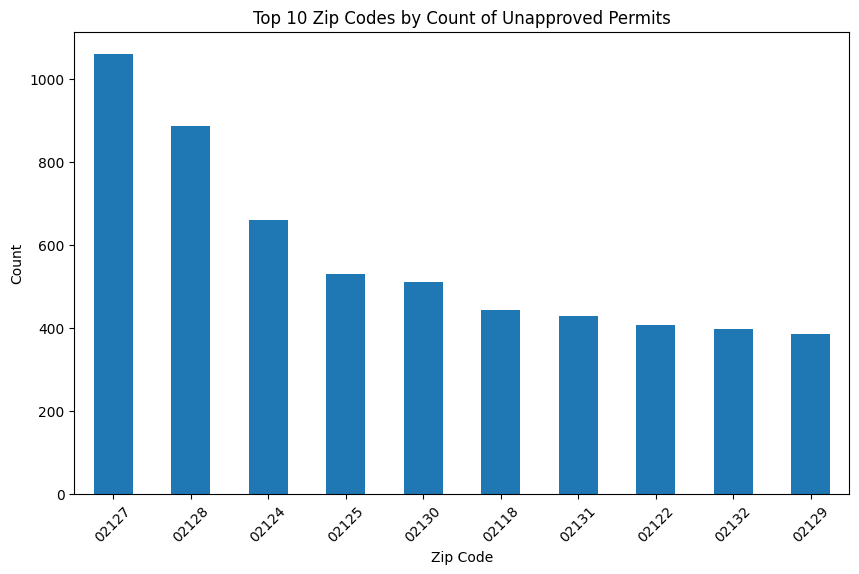

In [73]:
count_data = df.loc[df.Approved == 0].groupby('zip')['ID'].count().nlargest(10)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Top 10 Zip Codes by Count of Unapproved Permits')
plt.xticks(rotation=45)
plt.show()

In [43]:
df.loc[df.Approved==0].groupby('zip')['ID'].count().nsmallest(10)

zip
1803.0      1
2151.0      1
2199.0      1
2467.0      3
2210.0     33
2110.0     38
2109.0     60
2108.0     89
2111.0    104
2120.0    106
Name: ID, dtype: int64

In [49]:
df.loc[df.Approved==1].groupby('zip')['ID'].count().nlargest(10)

zip
2116.0    47300
2130.0    35581
2124.0    34914
2127.0    33496
2115.0    29469
2131.0    29300
2128.0    28476
2132.0    28382
2118.0    26839
2135.0    25841
Name: ID, dtype: int64

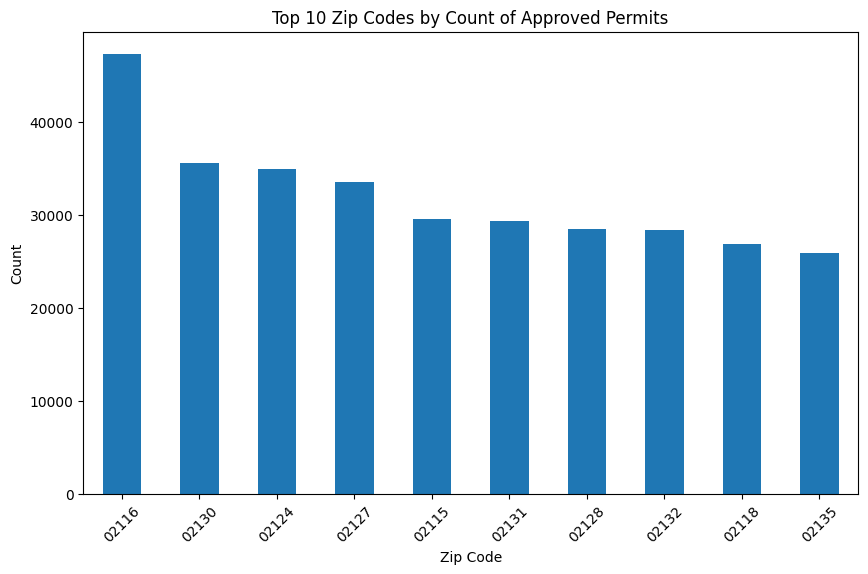

In [74]:
count_data2 = df.loc[df.Approved == 1].groupby('zip')['ID'].count().nlargest(10)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Top 10 Zip Codes by Count of Approved Permits')
plt.xticks(rotation=45)
plt.show()

In [83]:
df.head()

,ID,city,zip,Description,Approved
0,1,boston,02109,Interior/Exterior Work,1
1,2,roxbury,02132,City of Boston,1
2,3,charlestown,02129,Other,1
3,4,roxbury,02118,Interior/Exterior Work,1
4,5,brighton,02135,Renovations - Exterior,1


In [84]:
df.tail()

,ID,city,zip,Description,Approved
631311,BOA264014,boston,02111,Change from residential to office family assoc...,0
631312,BOA262723,hydepark,02131,Change occupancy from single family to two Blo...,0
631313,BOA262758,boston,02111,Remove proviso to this petitioner only per pla...,0
631314,BOA262762,boston,02116,Underground basement addition An indoor pool 4...,0
631315,BOA217901,roxbury,02132,WHEN PLANS COME BACK FROM BOA DW OP HOLD APPLI...,0
